In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

"""Utility functions"""
def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
		# Quiz: Read and join data for each symbol
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])

    return df

In [3]:
symbols = ['SPY','GOOG', 'IBM', 'GLD']
start_date = '2010-01-01'
end_date = '2010-12-31';
dates = pd.date_range(start_date, end_date)


In [4]:
df = get_data(symbols, dates)

In [5]:
df

,SPY,GOOG,IBM,GLD
2010-01-04,108.27,626.75,126.24,109.80
2010-01-05,108.56,623.99,124.71,109.70
2010-01-06,108.64,608.26,123.90,111.51
2010-01-07,109.10,594.10,123.47,110.82
2010-01-08,109.46,602.02,124.71,111.37
...,...,...,...,...
2010-12-27,121.90,602.38,141.17,135.02
2010-12-28,122.07,598.92,141.53,137.22
2010-12-29,122.16,601.00,142.32,137.71
2010-12-30,121.97,598.86,142.46,137.03


In [6]:
# row slicing
df.loc['2010-01-01':'2010-01-31']

,SPY,GOOG,IBM,GLD
2010-01-04,108.27,626.75,126.24,109.80
2010-01-05,108.56,623.99,124.71,109.70
2010-01-06,108.64,608.26,123.90,111.51
2010-01-07,109.10,594.10,123.47,110.82
2010-01-08,109.46,602.02,124.71,111.37
2010-01-11,109.61,601.11,123.41,112.85
2010-01-12,108.59,590.48,124.39,110.49
2010-01-13,109.51,587.09,124.12,111.54
2010-01-14,109.80,589.85,126.10,112.03
2010-01-15,108.57,580.00,125.60,110.86


In [7]:
# column slicing
df['GOOG']

2010-01-04    626.75
2010-01-05    623.99
2010-01-06    608.26
2010-01-07    594.10
2010-01-08    602.02
               ...  
2010-12-27    602.38
2010-12-28    598.92
2010-12-29    601.00
2010-12-30    598.86
2010-12-31    593.97
Name: GOOG, Length: 252, dtype: float64

In [8]:
df[['IBM','GLD']]

,IBM,GLD
2010-01-04,126.24,109.80
2010-01-05,124.71,109.70
2010-01-06,123.90,111.51
2010-01-07,123.47,110.82
2010-01-08,124.71,111.37
...,...,...
2010-12-27,141.17,135.02
2010-12-28,141.53,137.22
2010-12-29,142.32,137.71
2010-12-30,142.46,137.03


In [9]:
# rows and column slicing combined
df.loc['2010-03-10':'2010-03-15',['SPY','IBM']]

,SPY,IBM
2010-03-10,109.84,120.26
2010-03-11,110.30,122.16
2010-03-12,110.31,122.48
2010-03-15,110.34,122.38


In [10]:
# plotting stock prices here
def plot_data(df, title="Stock prices"):
    ax = df.plot(title=title, fontsize=2)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()

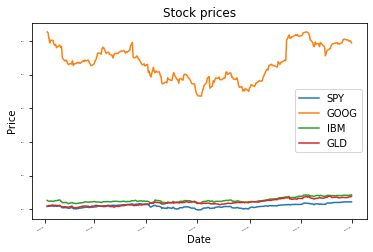

In [11]:
plot_data(df)

In [12]:
def plot_selected(df, columns, start_index, end_index,title="DOGE"):
    df_slice = df.loc[start_index:end_index,columns]
    ax = df_slice.plot(title=title)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()

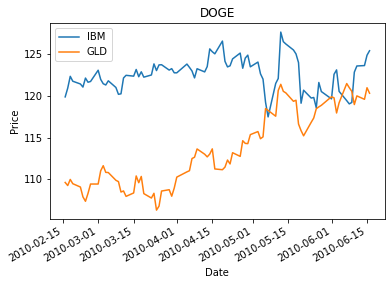

In [13]:
columns = ['IBM','GLD']
dates = ['2010-02-14','2010-06-16']
plot_selected(df,columns,dates[0],dates[1])

In [18]:
# Normalize the data to start at the same point
def normalize_data(df):
    return df/df.iloc[0]

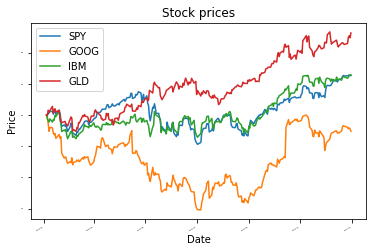

In [19]:
df2 = normalize_data(df)
plot_data(df2)